### This notebook uses a file .h5 (just 6 seconds of observation).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from datetime import datetime
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation

## Open .h5 file and make some plots of the directions of the events

In [3]:
#data = pd.read_hdf('dl2_LST-1.Run02929.0000.h5')
with h5py.File('dl2_LST-1.Run02929.0000.h5', 'r') as f:
    data = pd.DataFrame(np.array(f['dl2/event/telescope/parameters/LST_LSTCam']))
    
data.head()

,intensity,log_intensity,x,y,r,phi,length,width,psi,skewness,...,log_reco_energy,reco_energy,reco_disp_dx,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness
0,14019.949485,4.146746,-0.015204,-0.005036,0.016016,-2.821747,1.173447,1.142609,0.518989,0.023384,...,1.161159,14.493039,0.586236,0.238408,0.571033,0.233373,1.281348,1.902129,101,0.081857
1,76.737119,1.885005,-0.527041,-0.305895,0.609380,-2.615709,0.079877,0.073439,0.426368,0.060108,...,-1.459769,0.034692,-0.153171,-0.079658,-0.680212,-0.385553,1.236501,1.830964,101,0.386667
2,25.876774,1.412910,-0.349313,0.001244,0.349315,3.138032,0.088380,0.040477,0.769460,0.026443,...,-1.569809,0.026927,0.050654,0.022915,-0.298659,0.024159,1.250402,1.875670,101,0.305238
3,25.759664,1.410940,0.122801,-0.445033,0.461665,-1.301559,0.061317,0.053258,-1.157097,0.232783,...,-1.334617,0.046279,0.056081,-0.049218,0.178882,-0.494252,1.266962,1.813900,101,0.226262
4,44.028748,1.643736,-0.141567,0.933637,0.944309,1.721280,0.080193,0.045229,-1.103720,0.250541,...,-1.414461,0.038507,0.080160,0.050695,-0.061408,0.984333,1.256965,1.987032,101,0.251333


In [4]:
data.shape

(45084, 50)

In [5]:
print('maximum energy: {:.4F} TeV'.format(max(data['reco_energy'])))
print('minimum energy: {:.4F} TeV'.format(min(data['reco_energy'])))

maximum energy: 31.4679 TeV
minimum energy: 0.0140 TeV


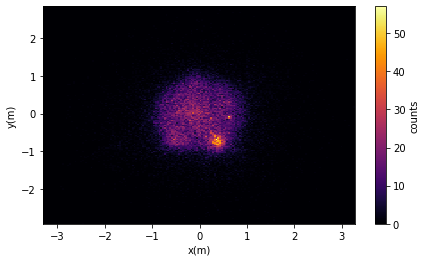

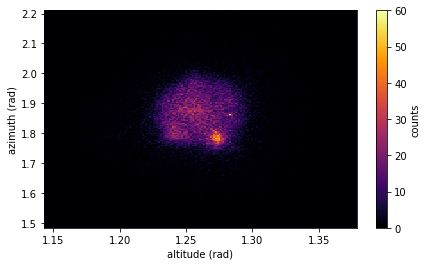

In [6]:
#plot de las direcciones reconstruidas de los sucesos 

plt.figure(figsize=(7,4))
(h1, xedges1, yedges1, i1) = plt.hist2d(data['reco_src_x'], data['reco_src_y'], bins = 175, cmap = 'inferno')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar(label='counts')
plt.savefig('events2.jpg')

plt.figure(figsize=(7,4))
(h2, xedges2, yedges2, i2) = plt.hist2d(data['reco_alt'], data['reco_az'], bins = 175, cmap = 'inferno')
plt.xlabel('altitude (rad)')
plt.ylabel('azimuth (rad)')
plt.colorbar(label='counts')
plt.savefig('events.jpg')

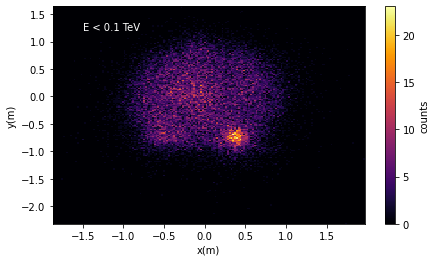

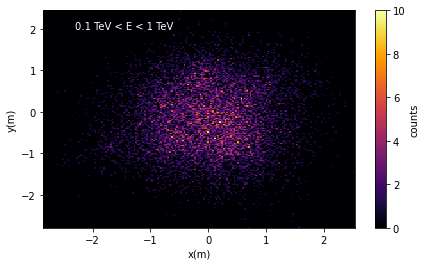

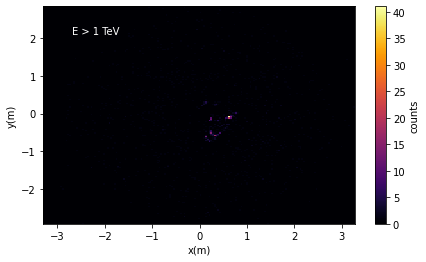

In [7]:
#plot de las direcciones reconstruidas de los sucesos para distintos rangos de energías reconstruidas

data1 = data[(data['reco_energy']<0.1)]
data2 = data[(data['reco_energy']>0.1) & (data['reco_energy']<1)]
data3 = data[(data['reco_energy']>1)]

plt.figure(figsize=(7,4))
(h3, xedges3, yedges3, i3) = plt.hist2d(data1['reco_src_x'], data1['reco_src_y'], bins = 175, cmap='inferno')
plt.text(-1.5, 1.2, 'E < 0.1 TeV', color='w')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar(label='counts')
plt.savefig('low_energy.jpg')

plt.figure(figsize=(7,4))
(h4, xedges4, yedges4, i4) = plt.hist2d(data2['reco_src_x'], data2['reco_src_y'], bins = 175, cmap='inferno')
plt.text(-2.3, 2, '0.1 TeV < E < 1 TeV', color='w')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar(label='counts')
plt.savefig('med_energy.jpg')

plt.figure(figsize=(7,4))
(h5, xedges5, yedges5, i5) = plt.hist2d(data3['reco_src_x'], data3['reco_src_y'], bins = 175, cmap='inferno')
plt.text(-2.7, 2.1, 'E > 1 TeV', color='w')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.colorbar(label='counts')
plt.savefig('high_energy.jpg')

## Calculate the equatorial coordinates (right ascension and declination) of the events

In [8]:
utc_time = []
for i in range(data.shape[0]):
    a = datetime.utcfromtimestamp(data['dragon_time'][i])
    utc_time.append(a)
    
data['utc_time'] = utc_time   #add new column to the data frame with the UTC observation times of the events

loc = EarthLocation(lat = 28.76138889*u.deg, lon = -17.89138889*u.deg, height = 2184*u.m)   #location of the telescope (CTA LST1: Roque de los Muchachos)

hor_coords = SkyCoord(alt = data['reco_alt'], az = data['reco_az'], frame = 'altaz', unit = 'rad', 
                      obstime = data['utc_time'], location = loc)   #horizontal coordinates of the events
eq_coords = hor_coords.icrs   #equatorial coordinates of the events

data['RA'] = eq_coords.ra     #add columns with right ascension and declination (equatorial coordinates) of the events
data['DEC'] = eq_coords.dec

data.head()

,intensity,log_intensity,x,y,r,phi,length,width,psi,skewness,...,reco_disp_dy,reco_src_x,reco_src_y,reco_alt,reco_az,reco_type,gammaness,utc_time,RA,DEC
0,14019.949485,4.146746,-0.015204,-0.005036,0.016016,-2.821747,1.173447,1.142609,0.518989,0.023384,...,0.238408,0.571033,0.233373,1.281348,1.902129,101,0.081857,2020-11-19 01:41:13.089447,82.610938,22.303412
1,76.737119,1.885005,-0.527041,-0.305895,0.609380,-2.615709,0.079877,0.073439,0.426368,0.060108,...,-0.079658,-0.680212,-0.385553,1.236501,1.830964,101,0.386667,2020-11-19 01:41:13.089525,85.698609,22.358240
2,25.876774,1.412910,-0.349313,0.001244,0.349315,3.138032,0.088380,0.040477,0.769460,0.026443,...,0.022915,-0.298659,0.024159,1.250402,1.875670,101,0.305238,2020-11-19 01:41:13.089546,84.547404,21.939324
3,25.759664,1.410940,0.122801,-0.445033,0.461665,-1.301559,0.061317,0.053258,-1.157097,0.232783,...,-0.049218,0.178882,-0.494252,1.266962,1.813900,101,0.226262,2020-11-19 01:41:13.089788,84.080750,23.315860
4,44.028748,1.643736,-0.141567,0.933637,0.944309,1.721280,0.080193,0.045229,-1.103720,0.250541,...,0.050695,-0.061408,0.984333,1.256965,1.987032,101,0.251333,2020-11-19 01:41:13.089822,83.182099,20.366085


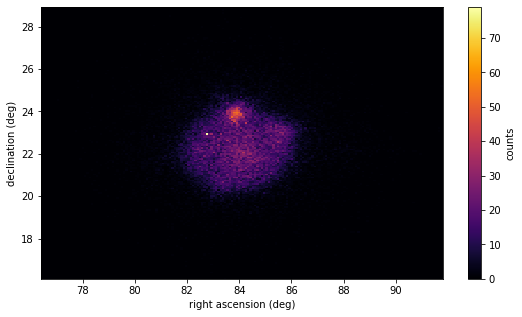

In [9]:
plt.figure(figsize=(9,5))
fig1 = plt.hist2d(data['RA'], data['DEC'], bins = 175, cmap = 'inferno')
plt.xlabel('right ascension (deg)')
plt.ylabel('declination (deg)')
plt.colorbar(label='counts')
plt.savefig('events_eqcoords.jpg')